<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#iris-dataset" data-toc-modified-id="iris-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>iris dataset</a></span></li><li><span><a href="#Ensemble" data-toc-modified-id="Ensemble-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ensemble</a></span><ul class="toc-item"><li><span><a href="#Bagging" data-toc-modified-id="Bagging-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bagging</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Voting" data-toc-modified-id="Voting-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Voting</a></span><ul class="toc-item"><li><span><a href="#VotingClassifier와-Pipeline과-GridSearchCV-연동" data-toc-modified-id="VotingClassifier와-Pipeline과-GridSearchCV-연동-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>VotingClassifier와 Pipeline과 GridSearchCV 연동</a></span></li><li><span><a href="#Pipeline과-GridSearchCV-연동해서-알고리즘과-하이퍼파라미터-찾기" data-toc-modified-id="Pipeline과-GridSearchCV-연동해서-알고리즘과-하이퍼파라미터-찾기-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Pipeline과 GridSearchCV 연동해서 알고리즘과 하이퍼파라미터 찾기</a></span></li><li><span><a href="#VotingClassifier-안에-있는-알고리즘의-하이퍼-파라미터를-수정하는-방법" data-toc-modified-id="VotingClassifier-안에-있는-알고리즘의-하이퍼-파라미터를-수정하는-방법-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>VotingClassifier 안에 있는 알고리즘의 하이퍼 파라미터를 수정하는 방법</a></span></li><li><span><a href="#VotingClassifier의-하이퍼-파라미터와-알고리즘의-하이퍼-파라미터-동시에-찾기" data-toc-modified-id="VotingClassifier의-하이퍼-파라미터와-알고리즘의-하이퍼-파라미터-동시에-찾기-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>VotingClassifier의 하이퍼 파라미터와 알고리즘의 하이퍼 파라미터 동시에 찾기</a></span></li></ul></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Boosting</a></span><ul class="toc-item"><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>AdaBoost</a></span></li><li><span><a href="#xgboost" data-toc-modified-id="xgboost-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>xgboost</a></span></li></ul></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Stacking</a></span></li></ul></li><li><span><a href="#make_column_transformer" data-toc-modified-id="make_column_transformer-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>make_column_transformer</a></span></li><li><span><a href="#비지도-학습" data-toc-modified-id="비지도-학습-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>비지도 학습</a></span><ul class="toc-item"><li><span><a href="#KMeans" data-toc-modified-id="KMeans-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>KMeans</a></span></li></ul></li></ul></div>

## iris dataset

In [6]:
import seaborn as sns

C:\Users\JINHYO\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
iris = sns.load_dataset('iris')

## Ensemble

### Bagging

In [1]:
from sklearn.ensemble import BaggingClassifier

In [2]:
# bagging 기법은 편차를 줄여준다.
# bagging 기법은 기본적으로 성능을 올리기 위한 목적이 아니다. 
# 데이터를 여러개로 쪼개서, 모델을 여러개 만든다.
# 파라미터 n_estimators의 기본값은 10
bc = BaggingClassifier()

In [7]:
# scikit-learn 공통 사용법: fit하고 predict
bc.fit(iris.iloc[:, :-1], iris.iloc[:, -1])

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [8]:
bc.predict([[3, 3, 3, 3]])

array(['virginica'], dtype=object)

train set과 test set를 나누어서 성능을 측정해본다.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1])

In [11]:
# base_estimator를 넣지 않으면 기본값으로 DecisionTree 알고리즘이 사용된다. 
# 논문에서 DecisionTree을 사용했기 때문에 이를 따랐다. (bagging도 의사결정나무도 Leo breiman이 고안함)
bc = BaggingClassifier()

In [12]:
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [13]:
# train set과 test set의 구성을 바꿔봐도 편차가 적다.
bc.score(X_test, y_test)

1.0

#### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Decision Tree 알고리즘과 bagging기법을 합쳐서 만든 알고리즘이 Random Forest이다.
# 이 알고리즘도 Leo Breiman이 고안했다.
rf = RandomForestClassifier()

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
rf.score(X_test, y_test)

1.0

### Voting

In [25]:
# Voting은 알고리즘의 집단 지성을 이용하는 방법이다.
from sklearn.ensemble import VotingClassifier

In [27]:
from sklearn.linear_model import LogisticRegression

In [29]:
# estimators 인자 -> 리스트 안에 튜플 / 튜플안에 (이름, 알고리즘) 형태
# voting - hard : 모델 여러개로부터 다수결로 최종 예측
#        - soft : 모델 여러개로부터 예측 확률을 종합해서 최종 예측 (predict_prob)
vc = VotingClassifier([('lr', LogisticRegression()), ('rf', RandomForestClassifier())])

In [30]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [34]:
vc.predict([[3,3,3,3]])

array(['setosa'], dtype=object)

`VotingClassifier`에는 `transfrom`이 있다.

In [35]:
# preprocessing의 transform과 역할이 다르다. (주의!)
# 각 모델이 무엇으로 예측했는지 알려준다.
# lr은 0으로 예측, rf는 2로 예측했다.
vc.transform([[3,3,3,3]])

array([[0, 2]])

In [36]:
# test 데이터마다 각 알고리즘이 예측한 값을 알 수 있다. 
vc.transform(X_test)

array([[2, 2],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0],
       [2, 2],
       [0, 0],
       [0, 0],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2],
       [2, 2]])

In [38]:
import pandas as pd

In [39]:
# pandas를 이용해서, 보고서 만들기 편하다.
pd.DataFrame(vc.transform(X_test), columns=['logistic regression', 'random forest'])

,logistic regression,random forest
0,2,2
1,1,1
2,0,0
3,2,2
4,1,1
5,2,2
6,2,2
7,2,2
8,2,2
9,2,2


weights 옵션으로, 모델 마다 가중치를 얼마나 줄지 정할 수 있다. 

In [40]:
# 적절한 weights 비율을 찾는 절대적인 방법은 없다.
# 알고리즘마다 따로 성능을 측정해보고, 그것에 비례해서 weights를 부여하는 방법도 있다.
# 또는 GridSearchCV를 사용할 수도 있다.
vc = VotingClassifier([('lr', LogisticRegression()), ('rf', RandomForestClassifier())], weights=[2,1])

#### VotingClassifier와 Pipeline과 GridSearchCV 연동

In [46]:
# Pipeline은 전처리할 때 컬럼을 선택해서 적용할 수 없기 때문에 진정한 자동화라고 하기 어렵다.
# 그래서 ColumnTransformer가 필요하다. 
# ColumnTransformer는 Pipeline 안에 넣을 수 있다.
from sklearn.pipeline import Pipeline

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [56]:
# VotingClassifier에는 알고리즘을 여러개 넣을 수 있다.
vc = VotingClassifier([('knn', KNeighborsClassifier()), ('svm', SVC())])

In [57]:
# Pipeline에는 VotingClassifier의 인스턴스를 estimator로 사용할 수 있다. 
pipe = Pipeline([('vc', vc)])

In [58]:
# GridSearchCV를 사용하기 위해서는 get_params에 있는 parameter 이름만 사용할 수 있다.
pipe.get_params()

{'memory': None,
 'steps': [('vc', VotingClassifier(estimators=[('knn',
                                 KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None, n_neighbors=5,
                                                      p=2, weights='uniform')),
                                ('svm',
                                 SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.00

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
# pipeline에 들어가면 하이퍼파라미터 이름은 mangling된다.
grid = GridSearchCV(pipe, {'vc__weights':[[1,2], [2,1]]})

In [61]:
grid.fit(iris.iloc[:, :-1], iris.species)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vc',
                                        VotingClassifier(estimators=[('knn',
                                                                      KNeighborsClassifier(algorithm='auto',
                                                                                           leaf_size=30,
                                                                                           metric='minkowski',
                                                                                           metric_params=None,
                                                                                           n_jobs=None,
                                                                                           n_neighbors=5,
                                                                                           p=2,
                                                   

#### Pipeline과 GridSearchCV 연동해서 알고리즘과 하이퍼파라미터 찾기

In [80]:
pipe2 = Pipeline([('clf', KNeighborsClassifier())])

In [81]:
# 리스트 안에 딕셔너리 형태로 만들면, 딕셔너리 안에서만 조합한다.
# 첫번째 딕셔너리 -> 알고리즘을 [svc, KNN]로 바꾼다. 
# 두번째 딕셔너리 -> 알고리즘을 KNN으로 하고, n_neighbors를 [2,3,4,5]로 바꿔가면서 학습한다.
grid2 = GridSearchCV(pipe2, [{'clf':[SVC(), KNeighborsClassifier()]},
                             {'clf':[KNeighborsClassifier()], 'clf__n_neighbors':[2,3,4,5]}])

In [82]:
grid2.fit(iris.iloc[: ,:-1], iris.species)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'clf': [SVC(C=1.0, break_ties=False, cache_size=200,
                                      class_weight=None, coef...
                                                       metric='minkowski',
    

In [83]:
grid2.best_params_

{'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform')}

In [84]:
# SVC 한번 + KNN (기본값) 한번 + KNN(n_neighbors=2~5) 4번 -> 총 6개 모델
pd.DataFrame(grid2.cv_results_).T

,0,1,2,3,4,5
mean_fit_time,0.00282269,0.00278687,0.00260167,0.00359387,0.00399823,0.00339975
std_fit_time,0.000744868,0.000992978,0.000809425,0.000498723,0.00063566,0.000489668
mean_score_time,0.00140433,0.00340505,0.00198369,0.00440564,0.00440664,0.00320082
std_score_time,0.000494586,0.000498797,1.9189e-05,0.00101858,0.000484822,0.000399924
param_clf,"SVC(C=1.0, break_ties=False, cache_size=200, c...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si..."
param_clf__n_neighbors,NaN,NaN,2,3,4,5
params,"{'clf': SVC(C=1.0, break_ties=False, cache_siz...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',...","{'clf': KNeighborsClassifier(algorithm='auto',..."
split0_test_score,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667
split1_test_score,0.966667,1,0.933333,0.966667,0.966667,1
split2_test_score,0.966667,0.933333,0.933333,0.933333,0.966667,0.933333


#### VotingClassifier 안에 있는 알고리즘의 하이퍼 파라미터를 수정하는 방법

In [62]:
vc = VotingClassifier([('knn', KNeighborsClassifier()), ('svm', SVC())])

In [63]:
pipe3 = Pipeline([('vc', vc)])

In [64]:
# GridSearchCV를 사용하기 위해서 parameter 이름을 확인한다.
pipe3.get_params()

{'memory': None,
 'steps': [('vc', VotingClassifier(estimators=[('knn',
                                 KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None, n_neighbors=5,
                                                      p=2, weights='uniform')),
                                ('svm',
                                 SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.00

In [68]:
# Pipeline에서 알고리즘의 하이퍼파라미터는 맹글링된다.
# Pipeline 안에 있는 VotingClassifier의 안에 있는 알고리즘의 하이퍼 파라미터를 GridSearch한다.
grid3 = GridSearchCV(pipe3, {'vc__svm__C':[1,2,3,4], 
                             'vc__knn__n_neighbors':[2,3,4,5,6]})

In [69]:
grid3.fit(iris.iloc[:, :-1], iris.species)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vc',
                                        VotingClassifier(estimators=[('knn',
                                                                      KNeighborsClassifier(algorithm='auto',
                                                                                           leaf_size=30,
                                                                                           metric='minkowski',
                                                                                           metric_params=None,
                                                                                           n_jobs=None,
                                                                                           n_neighbors=5,
                                                                                           p=2,
                                                   

In [70]:
pd.DataFrame(grid3.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
mean_fit_time,0.00678496,0.0134012,0.0112,0.00720057,0.00660181,0.00520167,0.00539656,0.00519962,0.00639801,0.00560036,0.00639887,0.0050014,0.00439944,0.00499945,0.00481124,0.00600338,0.00660167,0.0110006,0.00560098,0.00400119
std_fit_time,0.00116569,0.0118417,0.00271236,0.00231425,0.00215597,0.000749263,0.00196081,0.00146868,0.00204995,0.00119894,0.00101915,0.000895109,0.000489384,0.000632562,0.00117441,0.00178847,0.0013569,0.00167329,0.00119982,0.000633549
mean_score_time,0.00640683,0.00620046,0.00800023,0.00640049,0.00579929,0.00459661,0.00440221,0.00480003,0.00520086,0.00419946,0.00499949,0.00420232,0.00439963,0.00359859,0.00418878,0.00500021,0.00560031,0.00740156,0.00459986,0.00359955
std_score_time,0.00264991,0.00172082,0.00154914,0.00135651,0.00116528,0.000488857,0.00135682,0.000749081,0.00116888,0.000401643,0.00063407,0.000751674,0.00135768,0.000800267,0.000757508,0.00126448,0.00120309,0.0018546,0.00185481,0.000800564
param_vc__knn__n_neighbors,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6
param_vc__svm__C,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4
params,"{'vc__knn__n_neighbors': 2, 'vc__svm__C': 1}","{'vc__knn__n_neighbors': 2, 'vc__svm__C': 2}","{'vc__knn__n_neighbors': 2, 'vc__svm__C': 3}","{'vc__knn__n_neighbors': 2, 'vc__svm__C': 4}","{'vc__knn__n_neighbors': 3, 'vc__svm__C': 1}","{'vc__knn__n_neighbors': 3, 'vc__svm__C': 2}","{'vc__knn__n_neighbors': 3, 'vc__svm__C': 3}","{'vc__knn__n_neighbors': 3, 'vc__svm__C': 4}","{'vc__knn__n_neighbors': 4, 'vc__svm__C': 1}","{'vc__knn__n_neighbors': 4, 'vc__svm__C': 2}","{'vc__knn__n_neighbors': 4, 'vc__svm__C': 3}","{'vc__knn__n_neighbors': 4, 'vc__svm__C': 4}","{'vc__knn__n_neighbors': 5, 'vc__svm__C': 1}","{'vc__knn__n_neighbors': 5, 'vc__svm__C': 2}","{'vc__knn__n_neighbors': 5, 'vc__svm__C': 3}","{'vc__knn__n_neighbors': 5, 'vc__svm__C': 4}","{'vc__knn__n_neighbors': 6, 'vc__svm__C': 1}","{'vc__knn__n_neighbors': 6, 'vc__svm__C': 2}","{'vc__knn__n_neighbors': 6, 'vc__svm__C': 3}","{'vc__knn__n_neighbors': 6, 'vc__svm__C': 4}"
split0_test_score,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667
split1_test_score,0.933333,0.933333,0.933333,0.933333,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,1,1,1,0.966667,1,1,1
split2_test_score,1,1,1,1,1,1,1,1,1,1,1,1,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667,0.966667


#### VotingClassifier의 하이퍼 파라미터와 알고리즘의 하이퍼 파라미터 동시에 찾기

In [75]:
# vc__wights는 VotingClassifier의 하이퍼파라미터이다. 
# vc__svm__C, vc__knn__n_neighbors은 VotingClassifier의 안에 있는 알고리즘의 하이퍼파라미터이다.
grid4 = GridSearchCV(pipe3, {'vc__svm__C':[1,2,3,4], 
                             'vc__knn__n_neighbors':[2,3,4,5,6], 
                             "vc__weights":[[2,1], [1,2]]})

In [76]:
grid4.fit(iris.iloc[:, :-1], iris.species)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vc',
                                        VotingClassifier(estimators=[('knn',
                                                                      KNeighborsClassifier(algorithm='auto',
                                                                                           leaf_size=30,
                                                                                           metric='minkowski',
                                                                                           metric_params=None,
                                                                                           n_jobs=None,
                                                                                           n_neighbors=5,
                                                                                           p=2,
                                                   

In [77]:
grid4.best_params_

{'vc__knn__n_neighbors': 2, 'vc__svm__C': 2, 'vc__weights': [1, 2]}

### Boosting

#### AdaBoost

In [1]:
# boosting 계열 알고리즘은 종류가 많다.
# Ada 라는 여성에서 이름을 따왔다
from sklearn.ensemble import AdaBoostClassifier

In [12]:
ada = AdaBoostClassifier()

In [13]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [14]:
ada.score(X_test, y_test)

0.9736842105263158

#### xgboost


kaggle에서는 xgboost, lightGBM이 가장 인기가 많다.  
xgboosting은 scikit-learn에 없어서 다른 라이브러리를 써야한다.  
하지만 scikit-learn과 100% 호환이 된다.

In [ ]:
!pip install xgboost

In [2]:
from xgboost import XGBClassifier

In [3]:
xg = XGBClassifier()

In [5]:
from sklearn.model_selection import cross_val_score

In [11]:
# scikit=learn과 연동이 된다.
cross_val_score(xg, iris.iloc[:,:-1], iris.species, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

### Stacking

Stacking은 여러개의 모델이 예측한 결과를 다시 학습한다.  
예를 들어 A모델, B모델, C모델을 만들면,  

-> A 모델의 예측값을 학습해서 B모델을 만들고, B모델의 예측값을 학습해서 C모델을 만든다.  
-> 쌓아서 만든다고 해서 스택킹 모델이라고 함.

voting은 단순히 다수결이지만, Stacking은 더 정교하게 모델링할 수 있다.  
성능은 좋지만, 시간이 오래 걸리고 모델이 복잡한 단점이 있다.



In [15]:
from sklearn.ensemble import StackingClassifier

In [18]:
from sklearn.linear_model import LogisticRegression

In [21]:
sc = StackingClassifier([("lr", LogisticRegression()), ("knn", KNeighborsClassifier())])

In [22]:
sc.fit(X_train, y_train)

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


StackingClassifier(cv=None,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('knn',
                                KNeighborsClassifier(algorithm='auto',
                              

In [23]:
sc.score(X_test, y_test)

1.0

## make_column_transformer

In [41]:
# ColumnTransformer를 편하게 만들기 위해서 함수를 지원한다.
from sklearn.compose import make_column_transformer

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# tuple에 인스턴스와 사용할 열만 적으면 된다. 
# 가변 포지셔널 방식이므로, 리스트로 튜플을 묶을 필요가 없다. (ColumnTransformer와 차이점)
ct = make_column_transformer((StandardScaler(), [0,1,2]))

In [44]:
# 컬럼을 선택해서 전처리할 수 있다.
ct.fit_transform(iris.iloc[:, :-1], iris.species)

array([[-0.90068117,  1.01900435, -1.34022653],
       [-1.14301691, -0.13197948, -1.34022653],
       [-1.38535265,  0.32841405, -1.39706395],
       [-1.50652052,  0.09821729, -1.2833891 ],
       [-1.02184904,  1.24920112, -1.34022653],
       [-0.53717756,  1.93979142, -1.16971425],
       [-1.50652052,  0.78880759, -1.34022653],
       [-1.02184904,  0.78880759, -1.2833891 ],
       [-1.74885626, -0.36217625, -1.34022653],
       [-1.14301691,  0.09821729, -1.2833891 ],
       [-0.53717756,  1.47939788, -1.2833891 ],
       [-1.26418478,  0.78880759, -1.22655167],
       [-1.26418478, -0.13197948, -1.34022653],
       [-1.87002413, -0.13197948, -1.51073881],
       [-0.05250608,  2.16998818, -1.45390138],
       [-0.17367395,  3.09077525, -1.2833891 ],
       [-0.53717756,  1.93979142, -1.39706395],
       [-0.90068117,  1.01900435, -1.34022653],
       [-0.17367395,  1.70959465, -1.16971425],
       [-0.90068117,  1.70959465, -1.2833891 ],
       [-0.53717756,  0.78880759, -1.169

In [45]:
# ColumnTransformer를 이용하지 않으면, 모든 컬럼에 적용된다.
ss = StandardScaler()
ss.fit_transform(iris.iloc[:, :-1], iris.species)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## 비지도 학습

### KMeans

In [92]:
import seaborn as sns

In [93]:
iris = sns.load_dataset('iris')

In [98]:
# 정답(species)이 없는 데이터만으로, 학습한다.
iris.iloc[:, :-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
# KNN처럼, 거리가 가까운 것들은 비슷한 특징을 가질 것이라고 가정한다.
from sklearn.cluster import KMeans

In [94]:
import mglearn

C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\JINHYO\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


(Initialization) 처음에 랜덤하게 K개의 점(center)을 찍는다. 각각의 점은 어떤 군집을 의미한다.  
(Assign Points) 데이터와 점들의 거리를 측정한다. 데이터로부터 가장 가까운 점으로 군집을 할당한다.  
(Rcompute Centers) 군집 내의 데이터의 중앙점을 찾는다. 점(center)을 중앙점으로 옮긴다.  
Assign Points와 Recompute Centers 단계를 반복한다.

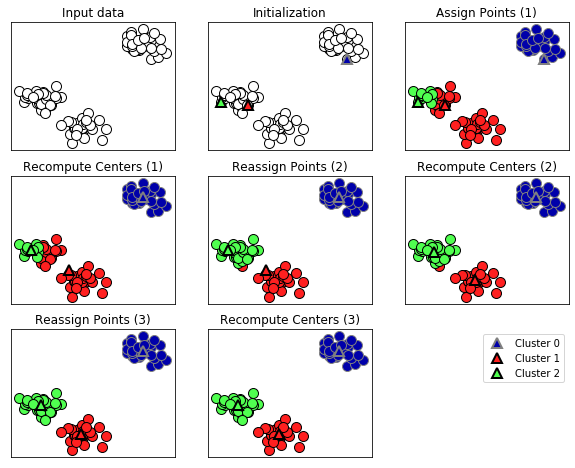

In [95]:
mglearn.plot_kmeans.plot_kmeans_algorithm()

In [100]:
# KMeans는 몇개로 군집화할 것인지 정해야한다.
km = KMeans(3)

In [101]:
# y값을 넣지 않는다 -> 비지도 학습
# cluster 결과에서 0, 1, 2가 의미가 없다. 같은 숫자이면 같은 것으로 분류했을 뿐이다. 
km.fit_predict(iris.iloc[:, :-1])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [112]:
# 실제 얼마나 잘 군집화했는지 비교해본다.
# map으로 cluster 결과와 비슷하게 숫자를 부여했다.
iris.species.map({'setosa':1, 'virginica':0, 'versicolor':2}).values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
# 비지도학습은, 정답이 없는 상태에서 학습해야하기 때문에 몇개로 clustering해야하는지 알 수 없다.
# => 검증할 수가 없다.
# 비지도학습 분야가 발전이 없는 이유이다.
km = KMeans(5)

In [26]:
# iris 데이터셋의 정답을 모르는 상태라면, cluster를 3이 아닌 다른 숫자로 설정하는 우를 범할 수도 있다. 
km.fit_predict(iris.iloc[:, :-1])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 2, 0, 4, 2, 2, 4, 3, 4, 2, 4,
       2, 2, 2, 0, 2, 2, 2, 4, 4, 0, 2, 0, 4, 0, 2, 4, 0, 0, 2, 4, 4, 4,
       2, 0, 0, 4, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])